# Supermarket Data Project

## Setup

In [1]:
import os
#print('Get current working directory :      ', os.getcwd())
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

df = pd.read_csv (r'C:\Users\presc\Downloads\Projects\SupermarketData\Stores.csv')
#print (df)

## Descriptive Statistics

In [2]:
df.head(10)
#Viewing first 10 rows of data frame  


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [3]:
df.describe()
#Descriptive stats of dataframe 


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


Text(0, 0.5, 'Area')

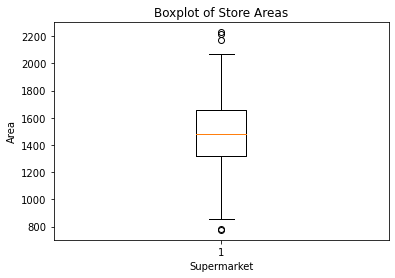

In [4]:
boxPlot=matplotlib.pyplot.boxplot(df.Store_Area)
plt.title('Boxplot of Store Areas')
plt.xlabel('Supermarket')
plt.ylabel('Area')

Text(0, 0.5, 'Count')

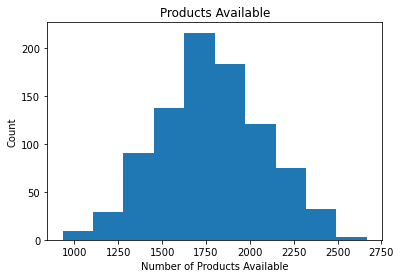

In [5]:
plt.hist(df.Items_Available)
plt.title('Products Available')
plt.xlabel('Number of Products Available')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

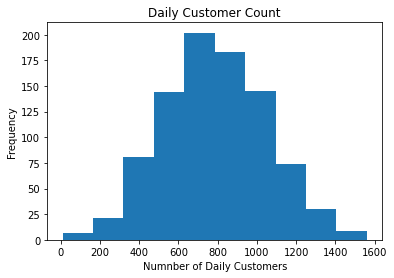

In [6]:
plt.hist(df.Daily_Customer_Count)
plt.title('Daily Customer Count')
plt.xlabel('Numnber of Daily Customers')
plt.ylabel('Frequency')

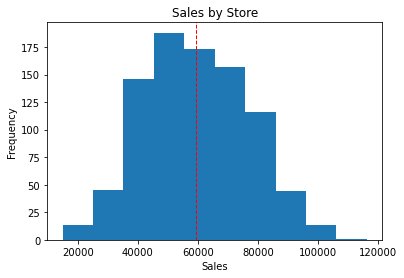

In [7]:
plt.hist(df.Store_Sales)
plt.title('Sales by Store')
plt.ylabel('Frequency')
plt.xlabel('Sales')
plt.axvline(df.Store_Sales.mean(), color='r', linestyle='dashed', linewidth=1)

# Uncovering Insights

## Is there a relationship between store size and traffic?

Text(0.5, 1.0, 'Scatterplot of Store Area and Daily Customer Count')

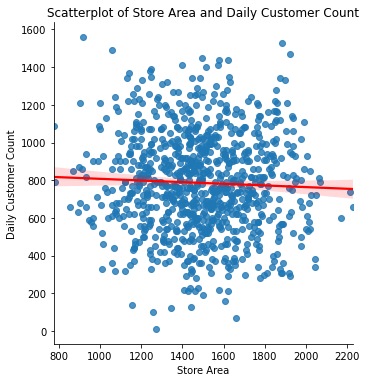

In [8]:
#scatterplot1=plt.scatter(df.Store_Area,df.Daily_Customer_Count)
sns.lmplot(x="Store_Area", y="Daily_Customer_Count", data=df, line_kws={'color': 'red'});
plt.xlabel('Store Area')
plt.ylabel('Daily Customer Count')
plt.title('Scatterplot of Store Area and Daily Customer Count')


In [9]:
np.corrcoef(df.Store_Area,df.Daily_Customer_Count)[0,1]

-0.041423095302691594

### Correlation coefficient of -0.041423095302691594 shows a very weak relationship between store area and daily customer count. 

## How about items and foot traffic?

Text(0.5, 1.0, 'Scatterplot of Available Items and Daily Customer Count')

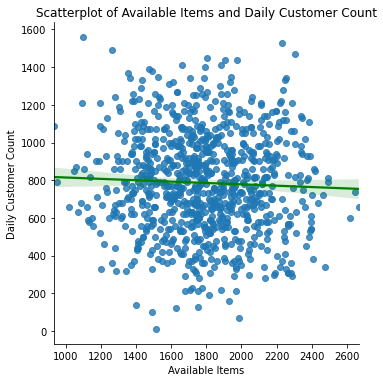

In [10]:
sns.lmplot(x="Items_Available", y="Daily_Customer_Count", data=df, line_kws={'color': 'green'});
plt.xlabel('Available Items')
plt.ylabel('Daily Customer Count')
plt.title('Scatterplot of Available Items and Daily Customer Count')

In [11]:
np.corrcoef(df.Items_Available,df.Daily_Customer_Count)[0,1]

-0.040978116728539675

### Also a low correlation here, as shown by the plot above. 

# What factors affect revenue?

### Looking at store area 

Text(0.5, 1.0, 'Scatterplot of Store Area and Sales')

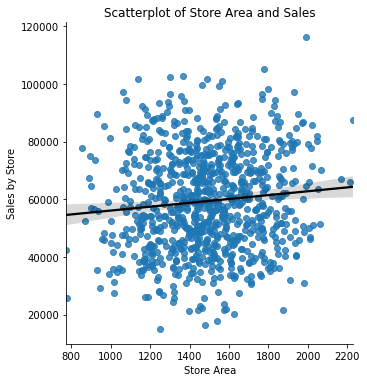

In [12]:
sns.lmplot(x="Store_Area", y="Store_Sales", data=df, line_kws={'color': 'black'});
plt.xlabel('Store Area')
plt.ylabel('Sales by Store')
plt.title('Scatterplot of Store Area and Sales')

In [13]:
#x=df.Store_Area.array #turning store_area variable into an array data type
#print(x) #viewing array

#print(df.Store_Area.array.shape) #Check how data is stored/ structured


StoresAreaX=df.Store_Area.values.reshape(-1, 1) #turning Store_Area variable into one column
#print(newX)



#print(type(x)) #check data type
y=df.Store_Sales.array #turning Store_Sales into an array
#print(y) #viewing our y var
#print(type(y)) #check type

model = LinearRegression()
model.fit(StoresAreaX, y)
model = LinearRegression().fit(StoresAreaX, y)
#running our regression using built in functions

r_sq = model.score(StoresAreaX, y) #used for computation

#printing our outputs
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.00950114078866826
intercept: 49404.64796575998
slope: [6.6962391]


### This is the model we get:


### $\hat{Y} = 49404.65 + 6.70 storeArea $

### This model predicts that an increase in store area of 100 (units) will increase daily sales by $670

### Looking at inventory

Text(0.5, 1.0, 'Scatterplot of Items Available and Sales')

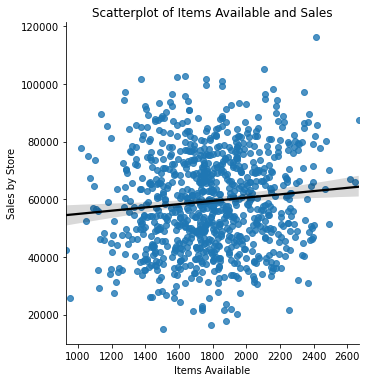

In [20]:
sns.lmplot(x="Items_Available", y="Store_Sales", data=df, line_kws={'color': 'black'});
plt.xlabel('Items Available')
plt.ylabel('Sales by Store')
plt.title('Scatterplot of Items Available and Sales')

In [15]:
ItemsAvailableX=df.Items_Available.values.reshape(-1, 1) #turning Store_Area variable into one column
#print(newX)



#print(type(x)) #check data type
y=df.Store_Sales.array #turning Store_Sales into an array
#print(y) #viewing our y var
#print(type(y)) #check type

model = LinearRegression()
model.fit(ItemsAvailableX, y)
model = LinearRegression().fit(ItemsAvailableX, y)
#running our regression using built in functions

r_sq = model.score(ItemsAvailableX, y) #used for computation

#printing our outputs
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.009771210753148463
intercept: 49252.983647381836
slope: [5.66673388]


### Our regression model is: 

### $\hat{Y} = 49252.98 + 5.67itemsAvailable $

### Adding one new unique item to the store will likely increase sales by $5.67

### And lastly, foot traffic...

Text(0.5, 1.0, 'Scatterplot of Daily Customers and Sales')

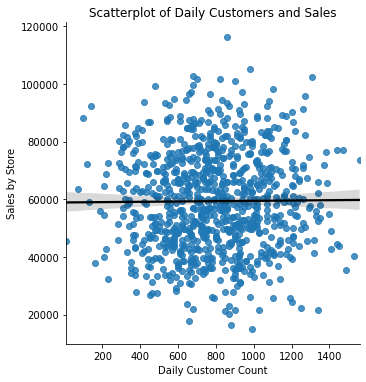

In [27]:
sns.lmplot(x="Daily_Customer_Count", y="Store_Sales", data=df, line_kws={'color': 'black'});
plt.xlabel('Daily Customer Count')
plt.ylabel('Sales by Store')
plt.title('Scatterplot of Daily Customers and Sales')

In [17]:
customerCount=df.Daily_Customer_Count.values.reshape(-1, 1) #turning Store_Area variable into one column
#print(newX)



#print(type(x)) #check data type
y=df.Store_Sales.array #turning Store_Sales into an array
#print(y) #viewing our y var
#print(type(y)) #check type

model = LinearRegression()
model.fit(customerCount, y)
model = LinearRegression().fit(customerCount, y)
#running our regression using built in functions

r_sq = model.score(customerCount, y) #used for computation

#printing our outputs
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 7.445459606436611e-05
intercept: 58911.79137595662
slope: [0.55892946]


### $\hat{Y} = 58911.79 + .55custCount $

### Increasing the number of customers by 100 will increase sales by $55 according to our model

### Looking at the variables (store area, available items, number of customers) together


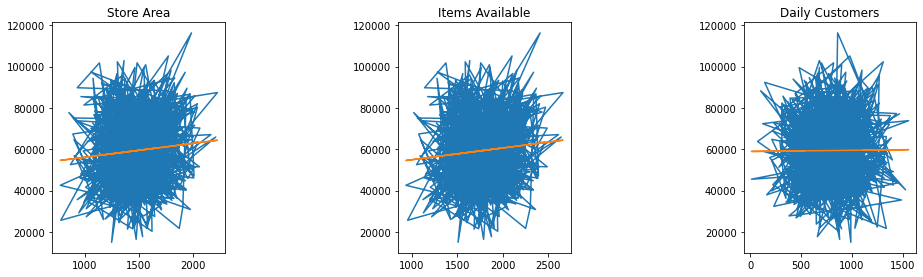

In [26]:
plt.subplot(1, 3, 1)
plt.plot(df.Store_Area, df.Store_Sales)
m, b = np.polyfit(df.Store_Area, df.Store_Sales, 1)
plt.plot(df.Store_Area, m*df.Store_Area + b)
plt.title('Store Area')

plt.subplot(1, 3, 2)
plt.plot(df.Items_Available, df.Store_Sales)
m, b = np.polyfit(df.Items_Available, df.Store_Sales, 1)
plt.plot(df.Items_Available, m*df.Items_Available + b)
plt.title('Items Available')

plt.subplot(1, 3, 3)
plt.plot(df.Daily_Customer_Count, df.Store_Sales)
m, b = np.polyfit(df.Daily_Customer_Count, df.Store_Sales, 1)
plt.plot(df.Daily_Customer_Count, m*df.Daily_Customer_Count + b)
plt.title('Daily Customers')

plt.subplots_adjust(left=-1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=1, 
                    hspace=0.4)

### Putting them all in a regression together

In [29]:
X = df[['Store_Area', 'Items_Available','Daily_Customer_Count']]
y = df['Store_Sales']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

[-39.03556986  38.23415464   0.8046133 ]
intercept: 58911.79137595662
slope: [0.55892946]


### $\hat{Y} = 58911.79 - 39.04storeArea + 38.23itemsAvailable + .80custCount $

#### Increasing store area may lead to a decrease in overall revenue, while offering more items and increasing the number of customers would possibly lead to an increase in revenue. 